In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
np.random.seed(42)

In [3]:
raw_data = pd.read_csv("Datasets/Buli-Predictor/buli.csv")

In [4]:
raw_data

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2019-08-16,20:30,Bayern Munich,2.7,2–2,0.9,Hertha BSC,75000.0,Allianz Arena,Harm Osmers,Match Report,NaN
1,1.0,Sat,2019-08-17,15:30,Leverkusen,2.7,3–2,1.2,Paderborn 07,26208.0,BayArena,Tobias Stieler,Match Report,NaN
2,1.0,Sat,2019-08-17,15:30,Freiburg,2.1,3–0,0.9,Mainz 05,24000.0,Schwarzwald-Stadion,Robert Hartmann,Match Report,NaN
3,1.0,Sat,2019-08-17,15:30,Wolfsburg,0.8,2–1,1.0,Köln,25099.0,Volkswagen Arena,Sven Jablonski,Match Report,NaN
4,1.0,Sat,2019-08-17,15:30,Werder Bremen,2.4,1–3,0.9,Düsseldorf,42100.0,Weserstadion,Felix Zwayer,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,34.0,Sat,2020-06-27,15:30,Freiburg,1.4,4–0,0.9,Schalke 04,NaN,Schwarzwald-Stadion,Martin Petersen,Match Report,NaN
337,34.0,Sat,2020-06-27,15:30,M'gladbach,3.4,2–1,0.8,Hertha BSC,NaN,Stadion im Borussia-Park,Deniz Aytekin,Match Report,NaN
338,34.0,Sat,2020-06-27,15:30,Union Berlin,1.8,3–0,1.1,Düsseldorf,NaN,Stadion An der Alten Försterei,Harm Osmers,Match Report,NaN
339,34.0,Sat,2020-06-27,15:30,Augsburg,0.3,1–2,2.2,RB Leipzig,NaN,WWK Arena,Felix Brych,Match Report,NaN


In [5]:
data_before_2020 = pd.read_csv("Datasets/Buli-Predictor/all_buli_seasons.csv")

In [6]:
data_before_2020

,Round,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,Regular Season,1.0,Fri,2018-08-24,20:30,Bayern Munich,2.8,3–1,0.7,Hoffenheim,75000.0,Allianz Arena,Bastian Dankert,Match Report,NaN
1,Regular Season,1.0,Sat,2018-08-25,15:30,Düsseldorf,1.1,1–2,1.3,Augsburg,40996.0,Merkur Spielarena,Markus Schmidt,Match Report,NaN
2,Regular Season,1.0,Sat,2018-08-25,15:30,Werder Bremen,1.7,1–1,1.1,Hannover 96,42100.0,Weserstadion,Felix Brych,Match Report,NaN
3,Regular Season,1.0,Sat,2018-08-25,15:30,Wolfsburg,1.1,2–1,1.4,Schalke 04,26621.0,Volkswagen Arena,Patrick Ittrich,Match Report,NaN
4,Regular Season,1.0,Sat,2018-08-25,15:30,Hertha BSC,1.3,1–0,1.3,Nürnberg,52729.0,Olympiastadion Berlin,Tobias Welz,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,Regular Season,34.0,Sat,2018-05-12,15:30,Wolfsburg,3.1,4–1,0.8,Köln,26112.0,Volkswagen Arena,Markus Schmidt,Match Report,NaN
674,Regular Season,34.0,Sat,2018-05-12,15:30,Hertha BSC,1.1,2–6,1.6,RB Leipzig,60502.0,Olympiastadion Berlin,Sven Jablonski,Match Report,NaN
675,Regular Season,34.0,Sat,2018-05-12,15:30,Bayern Munich,2.7,1–4,2.4,Stuttgart,75000.0,Allianz Arena,Sascha Stegemann,Match Report,NaN
676,Regular Season,34.0,Sat,2018-05-12,15:30,Mainz 05,0.9,1–2,1.1,Werder Bremen,34000.0,Opel Arena,Martin Petersen,Match Report,NaN


In [7]:
data_before_2020.dropna(axis=0,how="all",inplace=True)
data_before_2020.drop(axis=1,columns=["Round"],inplace=True)

In [8]:
raw_data.dropna(axis=0,how="all",inplace=True)

In [9]:
data_before_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 677
Data columns (total 14 columns):
Wk              612 non-null float64
Day             612 non-null object
Date            612 non-null object
Time            612 non-null object
Home            612 non-null object
xG              612 non-null float64
Score           612 non-null object
xG.1            612 non-null float64
Away            612 non-null object
Attendance      612 non-null float64
Venue           612 non-null object
Referee         612 non-null object
Match Report    612 non-null object
Notes           0 non-null float64
dtypes: float64(5), object(9)
memory usage: 50.2+ KB


Lets concatenate the two datasets into one big one

In [10]:
long_dataset = raw_data.append(data_before_2020)

In [11]:
long_dataset.sort_values(by="Date",ascending=False)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
339,34.0,Sat,2020-06-27,15:30,Augsburg,0.3,1–2,2.2,RB Leipzig,NaN,WWK Arena,Felix Brych,Match Report,NaN
335,34.0,Sat,2020-06-27,15:30,Leverkusen,1.7,1–0,0.4,Mainz 05,NaN,BayArena,Benjamin Cortus,Match Report,NaN
332,34.0,Sat,2020-06-27,15:30,Wolfsburg,0.9,0–4,3.4,Bayern Munich,NaN,Volkswagen Arena,Patrick Ittrich,Match Report,NaN
333,34.0,Sat,2020-06-27,15:30,Eint Frankfurt,1.9,3–2,2.5,Paderborn 07,NaN,Commerzbank-Arena,Benjamin Brand,Match Report,NaN
334,34.0,Sat,2020-06-27,15:30,Werder Bremen,3.0,6–1,0.8,Köln,NaN,Weserstadion,Bastian Dankert,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,1.0,Sat,2017-08-19,15:30,Mainz 05,1.0,0–1,0.8,Hannover 96,28279.0,Opel Arena,Felix Brych,Match Report,NaN
342,1.0,Sat,2017-08-19,15:30,Hamburger SV,0.7,1–0,0.8,Augsburg,49449.0,Volksparkstadion,Daniel Siebert,Match Report,NaN
341,1.0,Sat,2017-08-19,15:30,Hertha BSC,0.8,2–0,1.1,Stuttgart,44751.0,Olympiastadion Berlin,Sascha Stegemann,Match Report,NaN
340,1.0,Sat,2017-08-19,15:30,Hoffenheim,1.2,1–0,1.0,Werder Bremen,30150.0,Dietmar-Hopp-Stadion,Guido Winkmann,Match Report,NaN


In [12]:
data_scores = long_dataset[["Home","xG","Away","xG.1","Score"]]
data_scores

,Home,xG,Away,xG.1,Score
0,Bayern Munich,2.7,Hertha BSC,0.9,2–2
1,Leverkusen,2.7,Paderborn 07,1.2,3–2
2,Freiburg,2.1,Mainz 05,0.9,3–0
3,Wolfsburg,0.8,Köln,1.0,2–1
4,Werder Bremen,2.4,Düsseldorf,0.9,1–3
...,...,...,...,...,...
673,Wolfsburg,3.1,Köln,0.8,4–1
674,Hertha BSC,1.1,RB Leipzig,1.6,2–6
675,Bayern Munich,2.7,Stuttgart,2.4,1–4
676,Mainz 05,0.9,Werder Bremen,1.1,1–2


In [13]:
data_scores["Score"] = data_scores["Score"].apply(lambda x: x.split("–"))

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
data_scores

,Home,xG,Away,xG.1,Score
0,Bayern Munich,2.7,Hertha BSC,0.9,"[2, 2]"
1,Leverkusen,2.7,Paderborn 07,1.2,"[3, 2]"
2,Freiburg,2.1,Mainz 05,0.9,"[3, 0]"
3,Wolfsburg,0.8,Köln,1.0,"[2, 1]"
4,Werder Bremen,2.4,Düsseldorf,0.9,"[1, 3]"
...,...,...,...,...,...
673,Wolfsburg,3.1,Köln,0.8,"[4, 1]"
674,Hertha BSC,1.1,RB Leipzig,1.6,"[2, 6]"
675,Bayern Munich,2.7,Stuttgart,2.4,"[1, 4]"
676,Mainz 05,0.9,Werder Bremen,1.1,"[1, 2]"


This is a function that returns 0 if a draw, 1 if the home-team wins, and 2 if away-team wins

In [15]:
def check_class(x):
    home_score = x[0]
    away_score = x[1]
    return 1 if home_score > away_score else 0 if home_score == away_score else 2

In [16]:
data_scores["Score"] = data_scores["Score"].apply(lambda x: check_class(x))

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Lets try and give every team a unique number so that our algorithm can work with the data. This is a bit tricky because there are new teams every season

In [17]:
teams = np.unique(data_scores.Home)

In [18]:
t_dict = {}

for idx,team in enumerate(teams):
    t_dict[team] = idx

In [19]:
t_dict

{'Augsburg': 0,
 'Bayern Munich': 1,
 'Dortmund': 2,
 'Düsseldorf': 3,
 'Eint Frankfurt': 4,
 'Freiburg': 5,
 'Hamburger SV': 6,
 'Hannover 96': 7,
 'Hertha BSC': 8,
 'Hoffenheim': 9,
 'Köln': 10,
 'Leverkusen': 11,
 "M'gladbach": 12,
 'Mainz 05': 13,
 'Nürnberg': 14,
 'Paderborn 07': 15,
 'RB Leipzig': 16,
 'Schalke 04': 17,
 'Stuttgart': 18,
 'Union Berlin': 19,
 'Werder Bremen': 20,
 'Wolfsburg': 21}

In [20]:
data_scores["Home"] = data_scores["Home"].apply(lambda x: t_dict[x])

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data_scores["Away"] = data_scores["Away"].apply(lambda x: t_dict[x])

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data_scores

,Home,xG,Away,xG.1,Score
0,1,2.7,8,0.9,0
1,11,2.7,15,1.2,1
2,5,2.1,13,0.9,1
3,21,0.8,10,1.0,1
4,20,2.4,3,0.9,2
...,...,...,...,...,...
673,21,3.1,10,0.8,1
674,8,1.1,16,1.6,2
675,1,2.7,18,2.4,2
676,13,0.9,20,1.1,2


In [23]:
from sklearn.model_selection import train_test_split as tts

In [24]:
X = data_scores[["Home","Away","xG","xG.1"]]
y = data_scores["Score"]

In [25]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)

In [26]:
print(len(X_test))
len(y_test)

230


230

Lets also create a small validation set of 20 instances

In [27]:
X_val = X_test[210:]
X_test = X_test[:210]

y_val = y_test[210:]
y_test = y_test[:210]

In [28]:
len(X_test)

210

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rand_for = RandomForestClassifier()

Lets use some param search to get the best hyperparameters. Because earlier the model was overfitting badly maybe we can regularize it a little

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
param = [
    {"n_estimators":[100,105,110,120,130], "max_depth":[5,10,12,15,20],"max_leaf_nodes":[2,3,6,10,50],
     "min_samples_leaf":[1,5,10,20], "min_samples_split":[8,10,12]}
]
grid_search = RandomizedSearchCV(rand_for,cv=5,param_distributions=param,
                                 scoring="neg_mean_squared_error", return_train_score=True)

In [33]:
best_attr = grid_search.fit(X_train,y_train)

In [34]:
best_attr.best_params_

{'n_estimators': 120,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 2,
 'max_depth': 20}

In [35]:
best_attr.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

It looks like the algorithm never predicts a draw which is odd

In [36]:
best_attr.classes_

array([0, 1, 2], dtype=int64)

In [37]:
train_pred = best_attr.predict(X_train)
train_pred

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,

In [38]:
np.array(y_train)

array([1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0,
       1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1,
       1, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 2,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1,
       2, 0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1,

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(np.array(y_train),train_pred)

0.5799418604651163

In [41]:
test_pred = best_attr.predict(X_test)

After having tweaked many different hyperparameters it looks like the algorithm cant get a prediction higher than 57.7 I assume that thats because it just predict the matchups the same when they play twice against each other

In [42]:
accuracy_score(np.array(y_test),test_pred)

0.5428571428571428

##### Lets try another algorithm

In [43]:
from sklearn.svm import LinearSVC

In [44]:
svm = LinearSVC(loss="hinge")

In [45]:
svm.fit(X_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [46]:
svm_train_pred = svm.predict(X_train)

In [47]:
svm_train_pred

array([2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,

In [48]:
accuracy_score(y_train,svm_train_pred)

0.5857558139534884

In [49]:
svm_test_pred = svm.predict(X_test)

In [50]:
accuracy_score(y_test,svm_test_pred)

0.5904761904761905

Lets check the accuracy on our validation set

In [51]:
len(X_val)

20

In [52]:
svm_val_predict = svm.predict(X_val)

In [53]:
accuracy_score(y_val,svm_val_predict)

0.6

And lets try the random forest

In [54]:
rand_for_predict = best_attr.predict(X_val)

In [55]:
accuracy_score(y_val,rand_for_predict)

0.7

In [56]:
rand_for_predict

array([1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1],
      dtype=int64)

This actually isn't half bad I just don't understand why the model won't predict draws. Its a multiclass model and draws arent that rare in the data

In [57]:
svm.classes_

array([0, 1, 2], dtype=int64)

I tried to plot the data but when I changed and used multiple seasons this of course made not much sense. Because its all randomized now so the same fixtures can appear multiple times and are overlapping. Nonetheless I like how the plot looks and don't just want to delete it becaue it took a little to figure it out

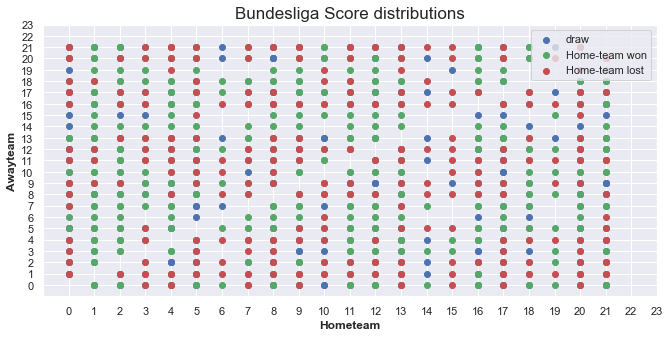

In [58]:
plt.figure(figsize=(11, 5))

plt.scatter(x=data_scores.iloc[:,0][data_scores["Score"]==0],y=data_scores.iloc[:,2][data_scores["Score"]==0],color="b",
           label="draw")
plt.scatter(x=data_scores.iloc[:,0][data_scores["Score"]==1],y=data_scores.iloc[:,2][data_scores["Score"]==1],color="g",
           label="Home-team won") 
plt.scatter(x=data_scores.iloc[:,0][data_scores["Score"]==2],y=data_scores.iloc[:,2][data_scores["Score"]==2],color="r",
           label="Home-team lost")
plt.axis([-1,23,-1,18])
plt.xticks(np.arange(0,24))
plt.xlabel("Hometeam",fontweight="bold")
plt.yticks(np.arange(0,24))
plt.ylabel("Awayteam",fontweight="bold")
plt.title("Bundesliga Score distributions",fontsize=17)
plt.legend()

I still have to figure out how to manipulate my data better in order to enhance the model performance. Or maybe the classical ML algorthims are all prone to underfitting because they are too simple. But lets first think that its not that

###### Making the model accessible to  the API

In [59]:
import pickle

In [60]:
pickle.dump(svm,open("bl_clf.pkl","wb"))

In [61]:
model = pickle.load(open("bl_clf.pkl","rb"))